In [66]:
%%time
%%time
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr

CPU times: total: 0 ns
Wall time: 2.01 ms
CPU times: total: 0 ns
Wall time: 8 ms


In [29]:
%%time
# Load the dataset
file_path = 'dataset.csv'
df = pd.read_csv(file_path)

sampled_df = df.sample(frac=1, random_state=42)

# Separate features and target column from the sampled data
X_sampled = sampled_df.drop(columns=['calss'])
y_sampled = sampled_df['calss']

# Perform train-test split (80:20 ratio) on the sampled data
X_train, X_test, y_train, y_test  = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42)

# Check the shape of the sampled and split data
print(f"Shape of X_train_sampled: {X_train.shape}")
print(f"Shape of X_test_sampled: {X_test.shape}")
print(f"Shape of y_train_sampled: {y_train.shape}")
print(f"Shape of y_test_sampled: {y_test.shape}")
df.head()

Shape of X_train_sampled: (62555, 79)
Shape of X_test_sampled: (15639, 79)
Shape of y_train_sampled: (62555,)
Shape of y_test_sampled: (15639,)
CPU times: total: 500 ms
Wall time: 575 ms


,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
0,0.0,1,0,40,0,40.0,-1.0,40.0,-1.0,40.0,...,0.0,-1.0,0.0,2.0,88704,-1,0.0,1,20,GeneralMalware
1,0.0,1,0,40,0,40.0,-1.0,40.0,-1.0,40.0,...,0.0,-1.0,0.0,2.0,88704,-1,0.0,1,20,GeneralMalware
2,0.0,1,0,40,0,40.0,-1.0,40.0,-1.0,40.0,...,0.0,-1.0,0.0,2.0,88704,-1,0.0,1,20,GeneralMalware
3,0.0,1,0,40,0,40.0,-1.0,40.0,-1.0,40.0,...,0.0,-1.0,0.0,2.0,88704,-1,0.0,1,20,GeneralMalware
4,0.0,1,0,40,0,40.0,-1.0,40.0,-1.0,40.0,...,0.0,-1.0,0.0,2.0,88704,-1,0.0,1,20,GeneralMalware


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

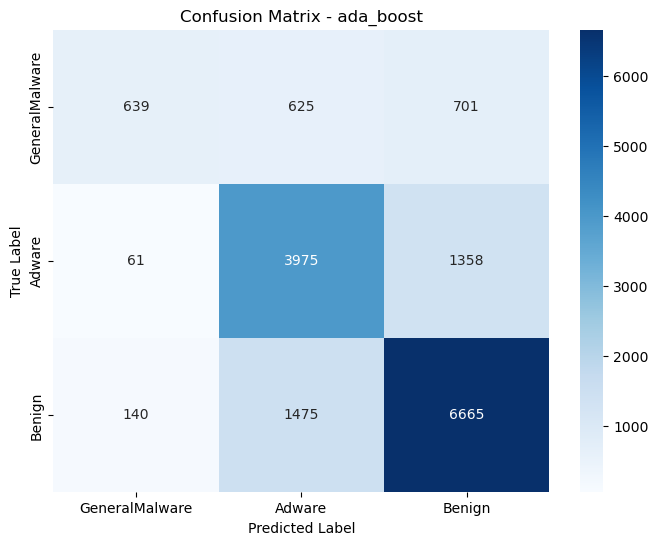

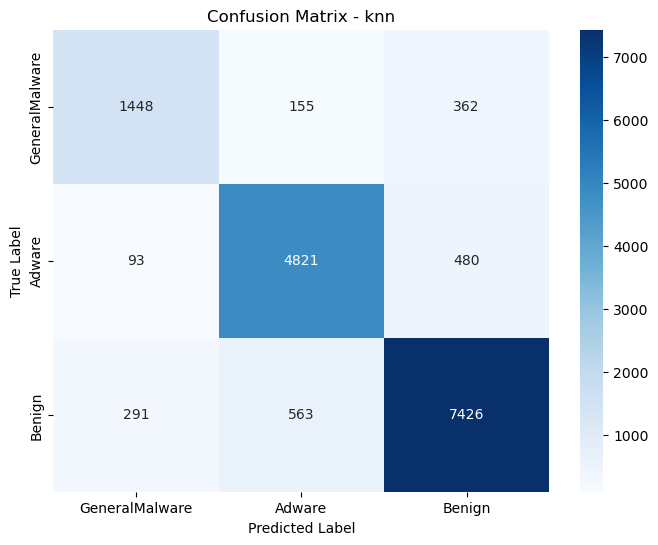

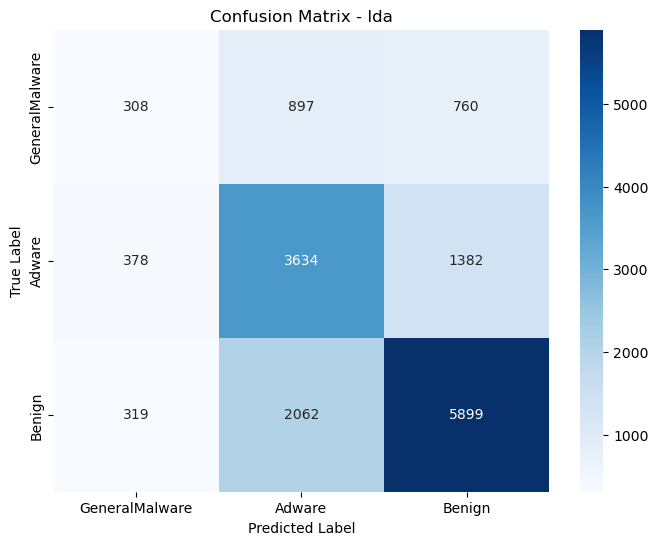

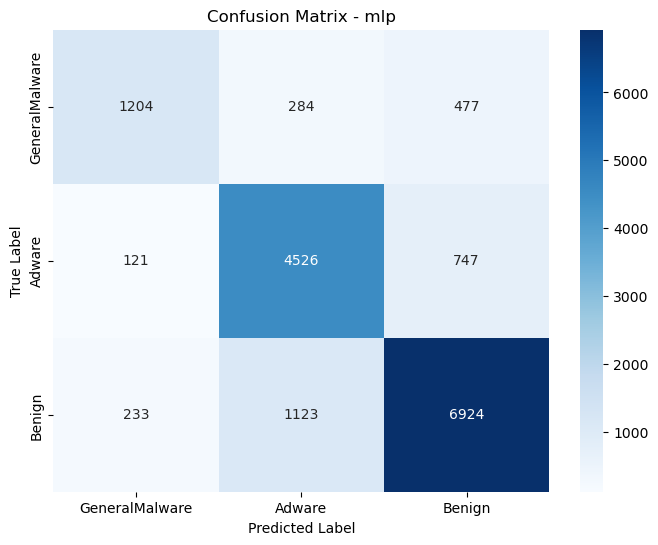

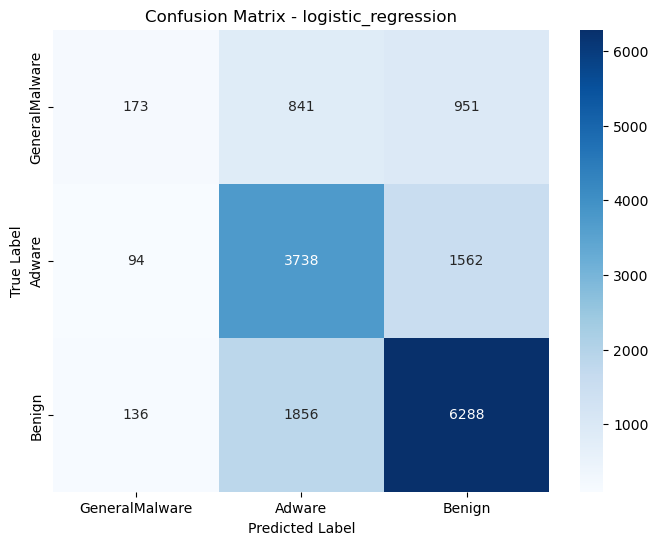

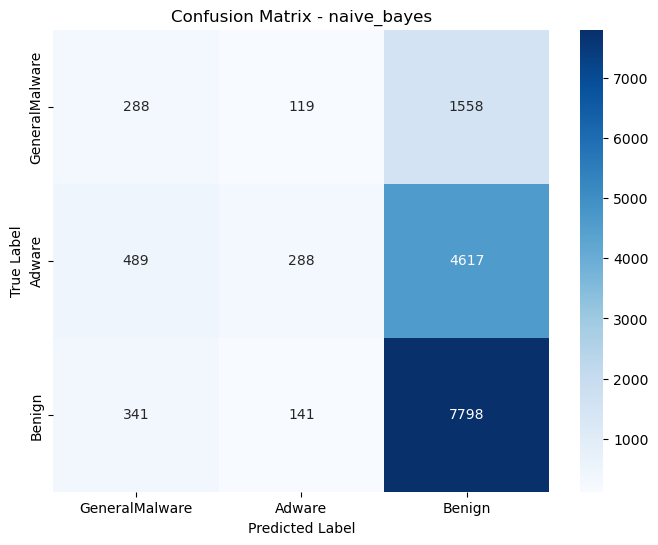

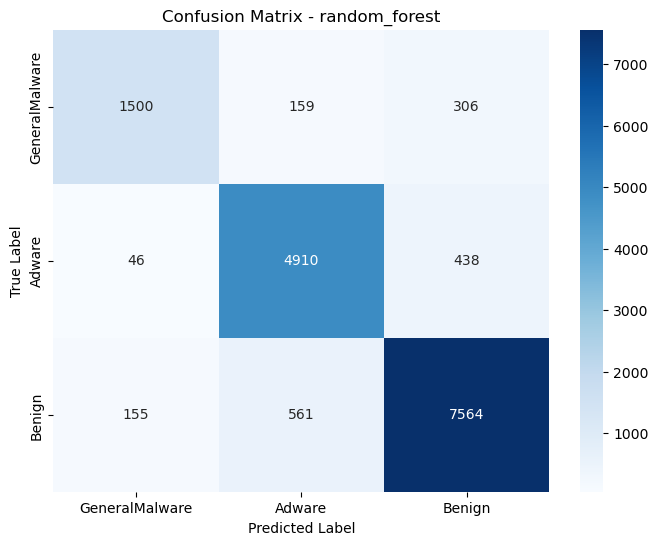

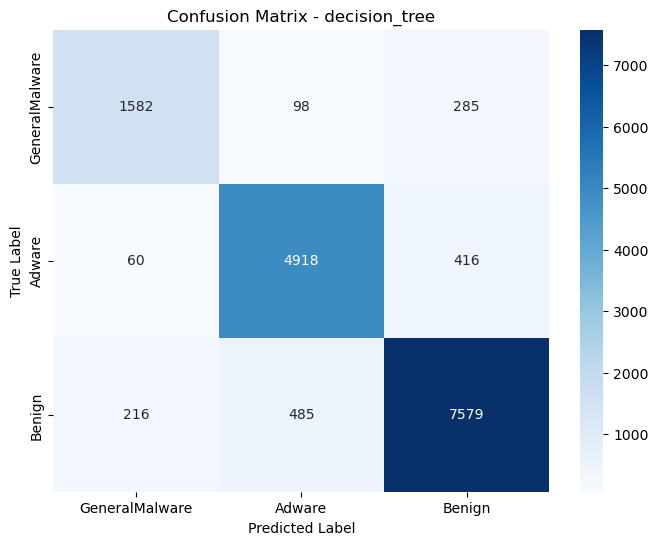

Model: ada_boost
Accuracy: 0.7412097960227636
Precision: 0.7463398947297771
Recall: 0.6423574842172063
F1-score: 0.6642403554384338

Model: knn
Accuracy: 0.8956953769422598
Precision: 0.8729761045359985
Recall: 0.8625088113963758
F1-score: 0.8673782684480207

Model: lda
Accuracy: 0.649260182876143
Precision: 0.5504245134786747
Recall: 0.5342980491340693
F1-score: 0.5322010991891131

Model: mlp
Accuracy: 0.8291310186073279
Precision: 0.815138851698287
Recall: 0.7826783300461728
F1-score: 0.7952039667559826

Model: logistic_regression
Accuracy: 0.6721516721017968
Precision: 0.5948768144441657
Recall: 0.5334844052979667
F1-score: 0.5247925370156736

Model: naive_bayes
Accuracy: 0.5554562312168297
Precision: 0.4670755324991111
Recall: 0.40058166120638833
F1-score: 0.34820579689131664

Model: random_forest
Accuracy: 0.9135353922885096
Precision: 0.9081318843644574
Recall: 0.882385339930106
F1-score: 0.8936996390929862

Model: decision_tree
Accuracy: 0.9202493765586035
Precision: 0.906936869

In [4]:
# Load the models and evaluate their accuracy
models = [
    'ada_boost',
    'knn',
    'lda',
    'mlp',
    'logistic_regression',
    'naive_bayes',
    'random_forest',
    'decision_tree'
]


loaded_models = {}
accuracies = {}
metrics={}

for model_name in models:
    with open(f'{model_name}.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
        loaded_models[model_name] = loaded_model
        y_pred= loaded_model.predict(X_test_scaled)
        cm = confusion_matrix(y_test,y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['GeneralMalware','Adware','Benign'], yticklabels=['GeneralMalware','Adware','Benign'])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.savefig(f'Confusion Matrix - {model_name}')
        plt.show()
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0.0)
        recall = recall_score(y_test, y_pred, average='macro',zero_division=0.0)
        f1 = f1_score(y_test, y_pred, average='macro')
        metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
        
for model_name, metric_values in metrics.items():
    print(f"Model: {model_name}")
    for metric_name, value in metric_values.items():
        print(f"{metric_name}: {value}")
    print()


Metrics for Ensemble Predictions:
Accuracy: 0.891169512117143
Precision: 0.8875055082341187
Recall: 0.8540597669509111
F1-score: 0.8682598814141137


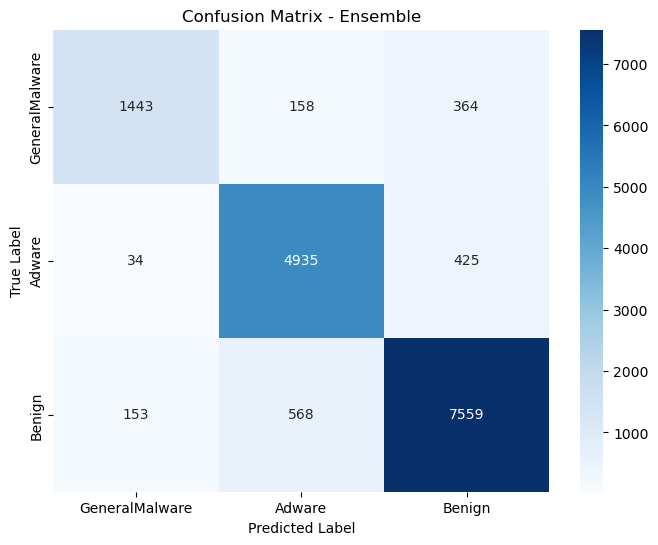

In [5]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


# Load the models and evaluate their accuracy
models = [
    'ada_boost',
    'knn',
    # 'lda',
    'mlp',
    # 'logistic_regression',
    # 'naive_bayes',
    'random_forest',
    'decision_tree'
]

loaded_models = {}
accuracies = {}
metrics = {}

# Store predictions of all models
all_predictions = {model_name: [] for model_name in models}

for model_name in models:
    with open(f'{model_name}.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
        loaded_models[model_name] = loaded_model
        y_pred = loaded_model.predict(X_test_scaled)
        all_predictions[model_name] = y_pred.tolist()  # Convert to list for easier processing

# Perform voting mechanism
ensemble_predictions = []
for data_index in range(len(X_test_scaled)):
    predictions = [all_predictions[model_name][data_index] for model_name in models]
    # Perform voting by choosing the most frequent prediction
    ensemble_predictions.append(max(set(predictions), key=predictions.count))

# Calculate metrics for ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
precision = precision_score(y_test, ensemble_predictions, average='macro', zero_division=0.0)
recall = recall_score(y_test, ensemble_predictions, average='macro', zero_division=0.0)
f1 = f1_score(y_test, ensemble_predictions, average='macro')
cm = confusion_matrix(y_test, ensemble_predictions)

# Update metrics dictionary with ensemble results
metrics['ensemble'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Print metrics for ensemble predictions
print("Metrics for Ensemble Predictions:")
for metric_name, value in metrics['ensemble'].items():
    print(f"{metric_name}: {value}")

# Plot confusion matrix for ensemble predictions
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['GeneralMalware', 'Adware', 'Benign'], yticklabels=['GeneralMalware', 'Adware', 'Benign'])
plt.title('Confusion Matrix - Ensemble')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('Confusion Matrix - Ensemble')
plt.show()


In [6]:
%%time
# Load the dataset
file_path_1 = './data/TotalFeatures-ISCXFlowMeter.csv'
df = pd.read_csv(file_path_1)

sampled_df = df.sample(frac=1, random_state=42)

# Separate features and target column from the sampled data
X = sampled_df.drop(columns=['calss'])
y = sampled_df['calss']


CPU times: total: 3.22 s
Wall time: 4.02 s


In [7]:
X_scaled = scaler.transform(X)

In [8]:
# Load the models and evaluate their accuracy
models = [
    'ada_boost',
    'knn',
    'lda',
    'mlp',
    'logistic_regression',
    'naive_bayes',
    'random_forest',
    'decision_tree'
]


loaded_models = {}
accuracies = {}
metrics={}

for model_name in models:
    with open(f'{model_name}.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
        loaded_models[model_name] = loaded_model
        y_pred= loaded_model.predict(X_scaled)
        cm = confusion_matrix(y,y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['GeneralMalware','Adware','Benign'], yticklabels=['GeneralMalware','Adware','Benign'])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.savefig(f'Confusion Matrix ICSX - {model_name}')
        plt.show()
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='macro', zero_division=0.0)
        recall = recall_score(y, y_pred, average='macro',zero_division=0.0)
        f1 = f1_score(y, y_pred, average='macro')
        metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
        
for model_name, metric_values in metrics.items():
    print(f"Model: {model_name}")
    for metric_name, value in metric_values.items():
        print(f"{metric_name}: {value}")
    print()


KeyboardInterrupt: 

C:\Users\Mohak\.conda\envs\MLPRAC\Lib\site-packages\scipy\stats\_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
C:\Users\Mohak\AppData\Local\Temp\ipykernel_20404\3033056406.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_array, y=correlation_values_sorted, palette=colors_sorted)


[5, 25, 26, 29, 30, 32, 31, 9, 8, 36, 10, 12, 11, 33, 35, 6, 38, 0, 23, 17, 13, 19, 37, 15, 7, 18, 24, 4, 2, 28, 14, 22, 27, 1, 20, 34, 16, 21, 3, 46, 47, 48, 51, 78, 50, 57, 41, 74, 42, 75, 49, 67, 71, 66, 70, 65, 69, 39, 44, 56, 43, 64, 68, 63, 40, 45, 72, 59, 76, 73, 61, 77, 60, 52, 54, 53, 62, 55, 58]


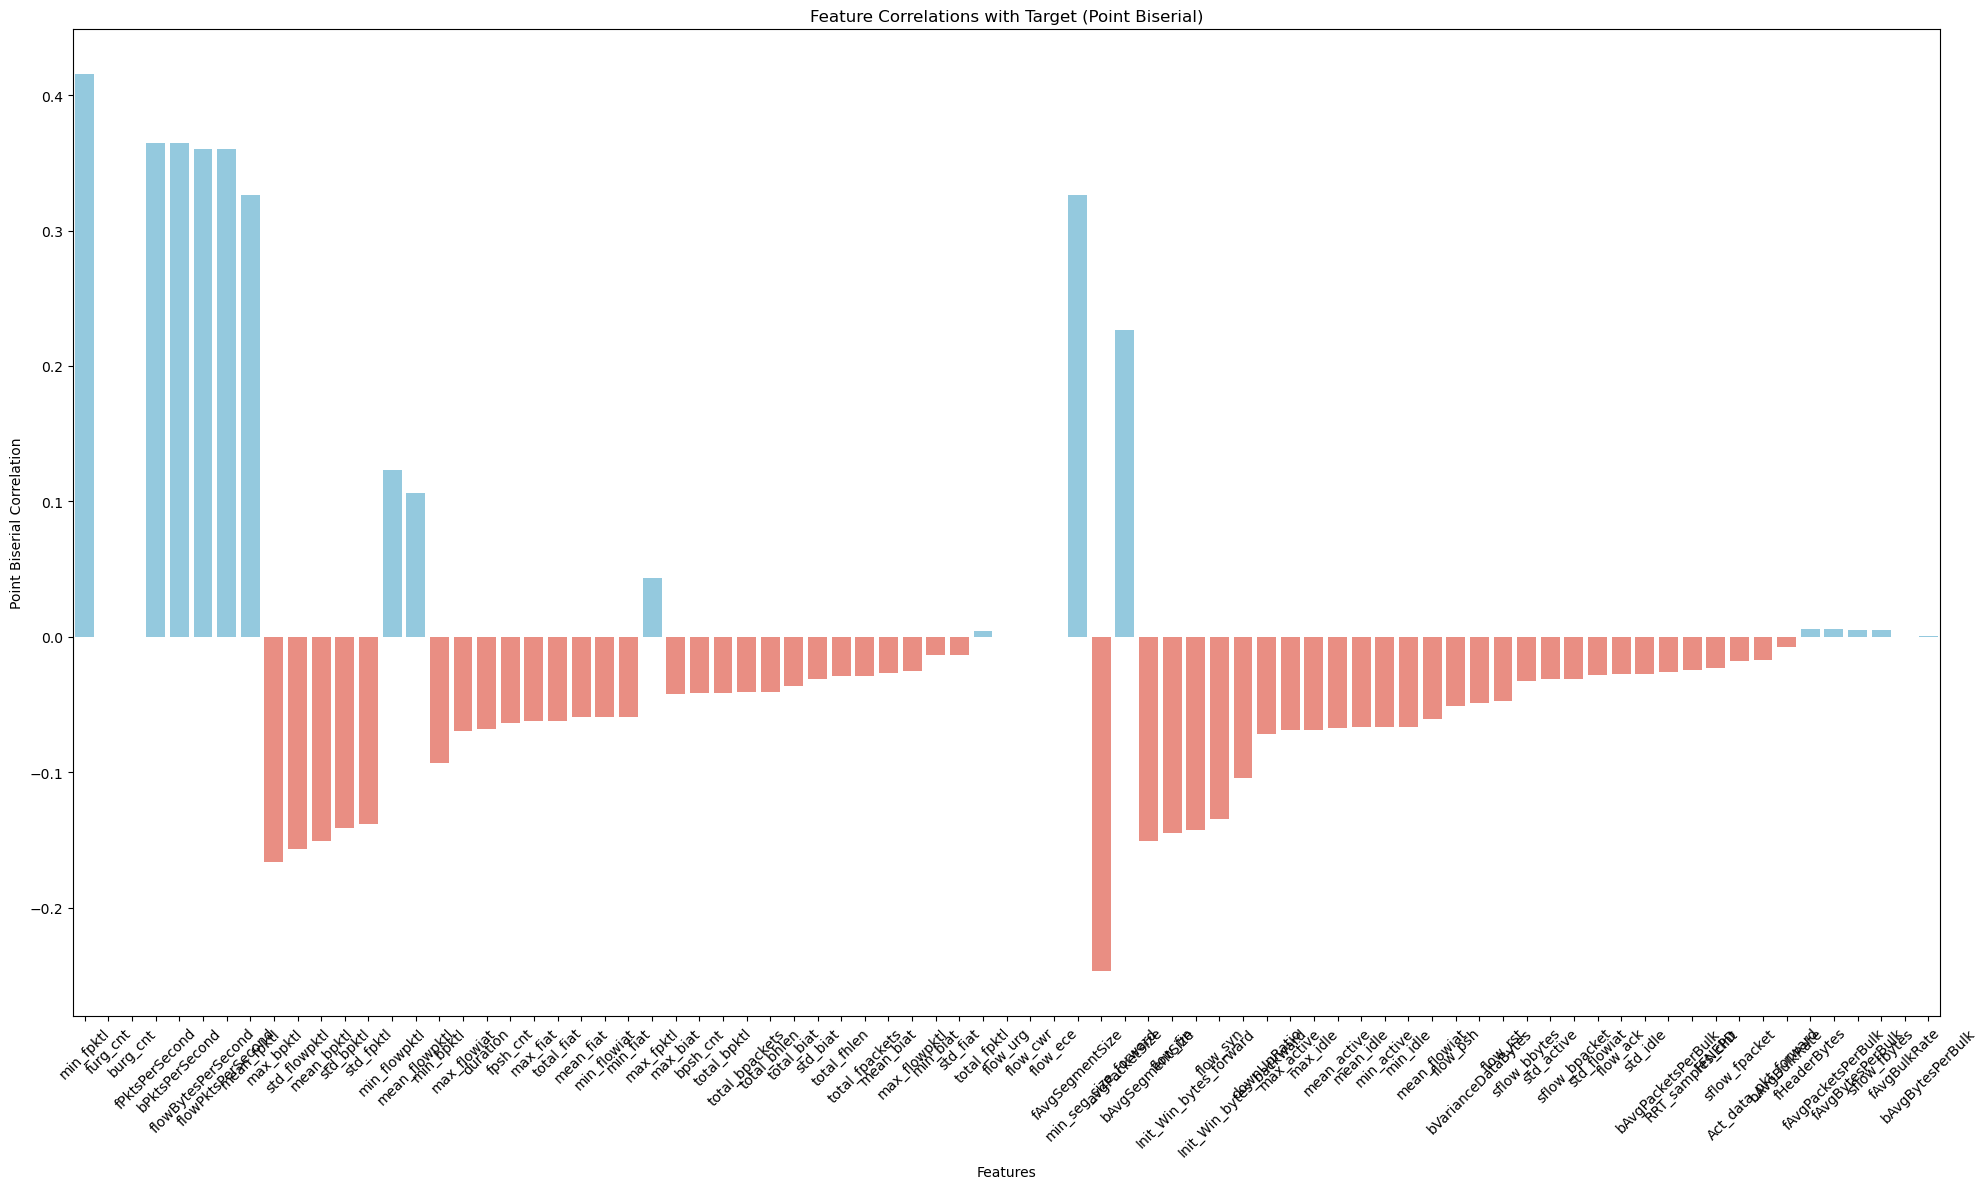

In [44]:
data_test = pd.DataFrame(X_test_scaled)
data_test['target_encoded'] = label_encoder.fit_transform(y_test)

# Get the feature names from X_test
feature_names_test = list(data_test.columns[:-1])  # Exclude the target and its encoded version

# Calculate point biserial correlation for each feature with the encoded target
correlations_test = {}
for feature_name in feature_names_test:
    correlation_test, _ = pointbiserialr(data_test[feature_name], data_test['target_encoded'])
    correlations_test[feature_name] = correlation_test

# Sort the correlations in descending order
sorted_correlations_test = sorted(correlations_test.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract feature names and correlations for plotting
feature_names_sorted = [feat for feat, _ in sorted_correlations_test]
correlation_values_sorted = [corr for _, corr in sorted_correlations_test]
print(feature_names_sorted)
# Mapping numbers to features
feature_mapping = {i: feature for i, feature in enumerate(X_train.columns)}


new_array = [feature_mapping[feature_names_sorted[i]] for i in range(len(feature_names_sorted))]


plt.figure(figsize=(20, 12))
colors_sorted = ['skyblue' if corr > 0 else 'salmon' for corr in correlation_values_sorted]  # Color based on correlation direction
sns.barplot(x=new_array, y=correlation_values_sorted, palette=colors_sorted)
plt.xlabel('Features')
plt.ylabel('Point Biserial Correlation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Feature Correlations with Target (Point Biserial)')
plt.tight_layout()
plt.savefig('Feature Correlations with Target (Point Biserial)')
plt.show()

In [52]:
extracted_features = new_array

print(extracted_features)

['min_fpktl', 'furg_cnt', 'burg_cnt', 'fPktsPerSecond', 'bPktsPerSecond', 'flowBytesPerSecond', 'flowPktsPerSecond', 'mean_fpktl', 'max_bpktl', 'std_flowpktl', 'mean_bpktl', 'std_bpktl', 'std_fpktl', 'min_flowpktl', 'mean_flowpktl', 'min_bpktl', 'max_flowiat', 'duration', 'fpsh_cnt', 'max_fiat', 'total_fiat', 'mean_fiat', 'min_flowiat', 'min_fiat', 'max_fpktl', 'max_biat', 'bpsh_cnt', 'total_bpktl', 'total_bpackets', 'total_bhlen', 'total_biat', 'std_biat', 'total_fhlen', 'total_fpackets', 'mean_biat', 'max_flowpktl', 'min_biat', 'std_fiat', 'total_fpktl', 'flow_urg', 'flow_cwr', 'flow_ece', 'fAvgSegmentSize', 'min_seg_size_forward', 'avgPacketSize', 'bAvgSegmentSize', 'flow_fin', 'Init_Win_bytes_forward', 'flow_syn', 'Init_Win_bytes_backward', 'downUpRatio', 'max_active', 'max_idle', 'mean_active', 'mean_idle', 'min_active', 'min_idle', 'mean_flowiat', 'flow_psh', 'bVarianceDataBytes', 'flow_rst', 'sflow_bbytes', 'std_active', 'sflow_bpacket', 'std_flowiat', 'flow_ack', 'std_idle', 'b

In [47]:
from scipy.stats import pearsonr

In [63]:
threshold = 0.08 # Set your desired threshold for correlation

# Initialize a list to store the features that meet the correlation threshold
selected_features = []

# Iterate through the features and their correlations
for feature_name, correlation in correlations_test.items():
    if abs(correlation) >= threshold:  # Check if the absolute correlation is above the threshold
        selected_features.append(feature_name)  # Add the feature to the selected features list

print(selected_features)

[5, 6, 8, 9, 10, 11, 12, 29, 30, 31, 32, 33, 35, 36, 41, 42, 50, 51, 57, 74, 75, 78]


In [64]:
new_array = [feature_mapping[feature_names_sorted[i]] for i in range(len(selected_features))]

In [65]:
new_array

['min_fpktl',
 'furg_cnt',
 'burg_cnt',
 'fPktsPerSecond',
 'bPktsPerSecond',
 'flowBytesPerSecond',
 'flowPktsPerSecond',
 'mean_fpktl',
 'max_bpktl',
 'std_flowpktl',
 'mean_bpktl',
 'std_bpktl',
 'std_fpktl',
 'min_flowpktl',
 'mean_flowpktl',
 'min_bpktl',
 'max_flowiat',
 'duration',
 'fpsh_cnt',
 'max_fiat',
 'total_fiat',
 'mean_fiat']